importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# reading the data we are going to use. It is an inventory data for zepto, I have worked as inventory clerk for almost 2 year now. so I am a bit
#  exited to work on the other side of the buiesness

df = pd.read_excel(r"C:\Users\rebor\OneDrive\Desktop\zepto inventory\zepto_v1.xlsx")
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250


We have the data we want but we can clearly see the data needs some cleaning it would have much better  to do it using SQL but lets do it over here. first it is obviuse that !kg of onion is not 2100 so we need to put a decimal point 

In [6]:
df['mrp'] = df["mrp"] * 0.001
df["discountedSellingPrice"] = df["discountedSellingPrice"] * 0.001

In [7]:
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2.5,16,3,2.1,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4.2,16,3,3.5,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5.1,15,3,4.3,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2.0,15,3,1.7,100,False,100
4,Fruits & Vegetables,Ladies Finger,1.4,14,3,1.2,250,False,250


now we have more acurate price lets make sure we don't have duplicate and null value

In [8]:
col_without_cat = []
for col in df.columns :
    if col == "Category" :
        continue
    else : col_without_cat.append(col)
df_without_cat = df[col_without_cat]
df_without_cat.head()


,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Onion,2.5,16,3,2.1,1000,False,1
1,Tomato Hybrid,4.2,16,3,3.5,1000,False,1
2,Tender Coconut,5.1,15,3,4.3,58,False,1
3,Coriander Leaves,2.0,15,3,1.7,100,False,100
4,Ladies Finger,1.4,14,3,1.2,250,False,250


In [9]:
df_duplicatd_wocat_count = df_without_cat.duplicated().sum()
df_duplicatd_wocat_count

np.int64(1931)

we have close to 2000 data which is duplicated which is much more than 50% of the entire data which is very big before we do anything lets try to understand it more.

In [10]:
df_duplicated_wocat = df_without_cat[df_without_cat.duplicated()]
df_duplicated_wocat.head()

,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
607,Maggi 2 Minute Masala Noodles,1.2,0,6,1.2,70,False,70
608,iD Idli & Dosa Batter,8.0,15,6,6.8,1000,False,1
609,Tata Salt,2.4,0,6,2.4,1000,False,1
610,Arden Eggs White,9.7,0,4,9.7,696,False,12
611,Arden Eggs White,6.5,15,4,5.5,348,False,6


In [11]:
df__tata_salt = df[df["name"] == "Tata Salt"]
df__tata_salt.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
95,Cooking Essentials,Tata Salt,2.4,0,6,2.4,1000,False,1
609,Munchies,Tata Salt,2.4,0,6,2.4,1000,False,1


In [12]:
df__Aew = df[df["name"] == "Arden Eggs White"]
df__Aew

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
96,Cooking Essentials,Arden Eggs White,9.7,0,4,9.7,696,False,12
97,Cooking Essentials,Arden Eggs White,6.5,15,4,5.5,348,False,6
610,Munchies,Arden Eggs White,9.7,0,4,9.7,696,False,12
611,Munchies,Arden Eggs White,6.5,15,4,5.5,348,False,6
1134,"Dairy, Bread & Batter",Arden Eggs White,9.7,0,4,9.7,696,False,12
1135,"Dairy, Bread & Batter",Arden Eggs White,6.5,15,4,5.5,348,False,6
1263,Beverages,Arden Eggs White,9.7,0,4,9.7,696,False,12
1264,Beverages,Arden Eggs White,6.5,15,4,5.5,348,False,6
2543,"Meats, Fish & Eggs",Arden Eggs White,9.7,0,4,9.7,696,False,12
2544,"Meats, Fish & Eggs",Arden Eggs White,6.5,15,4,5.5,348,False,6


It is no easy to detrmine if the dupicated data are relevant, but if you look closely you can see that there are only 2 Arden Eggs White there are only 2 kind but has entry on 5 different Category. 

In [13]:
df__dal = df[df["name"] == "Dettol Antiseptic Liquid"]
df__dal

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
3472,Home & Cleaning,Dettol Antiseptic Liquid,3.3,0,4,3.3,60,False,60
3634,Home & Cleaning,Dettol Antiseptic Liquid,3.0,0,0,3.0,60,True,60
3648,Health & Hygiene,Dettol Antiseptic Liquid,3.3,0,4,3.3,60,False,60
3731,Health & Hygiene,Dettol Antiseptic Liquid,3.0,0,0,3.0,60,True,60


In [14]:
df["name"].describe()

count                 3732
unique                1681
top       Arden Eggs White
freq                    10
Name: name, dtype: object

In [15]:
df__dal = df[df["name"] == "Amul Delicious Fat Spread - Cholesterol Free"]
df__dal

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
1155,"Dairy, Bread & Batter",Amul Delicious Fat Spread - Cholesterol Free,1.8,5,6,1.7,100,False,100
1159,"Dairy, Bread & Batter",Amul Delicious Fat Spread - Cholesterol Free,8.8,2,2,8.6,500,False,500
1284,Beverages,Amul Delicious Fat Spread - Cholesterol Free,1.8,5,6,1.7,100,False,100
1288,Beverages,Amul Delicious Fat Spread - Cholesterol Free,8.8,2,2,8.6,500,False,500
1387,Packaged Food,Amul Delicious Fat Spread - Cholesterol Free,1.8,5,6,1.7,100,False,100
1398,Packaged Food,Amul Delicious Fat Spread - Cholesterol Free,8.8,2,2,8.6,500,False,500
1775,Ice Cream & Desserts,Amul Delicious Fat Spread - Cholesterol Free,1.8,5,6,1.7,100,False,100
1786,Ice Cream & Desserts,Amul Delicious Fat Spread - Cholesterol Free,8.8,2,2,8.6,500,False,500
2163,Chocolates & Candies,Amul Delicious Fat Spread - Cholesterol Free,1.8,5,6,1.7,100,False,100
2174,Chocolates & Candies,Amul Delicious Fat Spread - Cholesterol Free,8.8,2,2,8.6,500,False,500


we have seen that the dublicated items are the same items  that are spread in different part of the store. so i think we should not  drop them.

In [16]:
df_dup =df[df.duplicated()]
df_dup

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
2946,Personal Care,Listerine Cool Mint Mouthwash - Mild Taste,15.0,10,6,13.5,250,False,250
3290,Paan Corner,Listerine Cool Mint Mouthwash - Mild Taste,15.0,10,6,13.5,250,False,250


it is not still clear if it is a duplicate or there is a category called Paan corner that contain stuff that contain stuff from diffetent category it is my assumbition that it is a mistake, lets check

In [17]:
df_pC = df[df["Category"] == "Paan Corner"]
df_pC.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
3097,Paan Corner,Clove Sensitive Toothpaste with Anti-Sensitivi...,16.0,35,3,10.4,80,False,80
3098,Paan Corner,Dettol Original Germ Protection Alcohol Based ...,2.5,0,6,2.5,50,False,50
3099,Paan Corner,Colgate Visible White Toothpaste,11.5,10,6,10.3,100,False,100
3100,Paan Corner,Dettol SKincare Handwash Value Refill,10.9,3,6,10.5,750,False,750
3101,Paan Corner,Savlon Herbal Sensitive Liquid Handwash Refill...,11.5,4,6,11.0,750,False,500


In [18]:
df_prc = df[df["Category"] == "Personal Care"]
df_prc.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
2753,Personal Care,Clove Sensitive Toothpaste with Anti-Sensitivi...,16.0,35,3,10.4,80,False,80
2754,Personal Care,Dettol Original Germ Protection Alcohol Based ...,2.5,0,6,2.5,50,False,50
2755,Personal Care,Colgate Visible White Toothpaste,11.5,10,6,10.3,100,False,100
2756,Personal Care,Dettol SKincare Handwash Value Refill,10.9,3,6,10.5,750,False,750
2757,Personal Care,Savlon Herbal Sensitive Liquid Handwash Refill...,11.5,4,6,11.0,750,False,500


AS we can see there is a mistake the Personal care and Pann corner are the same inventory that has been added twice in 2 different category. so can drop one of the categorys Personal Care is more general so we are going to drop all data that are in Paan corner category.

In [19]:
df = df.drop(df[df["Category"].str.contains("Paan Corner", case = False , na= False)].index)
df_pC = df[df["Category"] == "Paan Corner"]
df_pC


,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity


In [20]:
df_dup =df[df.duplicated()]
df_dup

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
2946,Personal Care,Listerine Cool Mint Mouthwash - Mild Taste,15.0,10,6,13.5,250,False,250


WE have droped the category called paan corner, lets now check if there null val

In [21]:
df_null = df.isnull().sum()
df_null

Category                  0
name                      0
mrp                       0
discountPercent           0
availableQuantity         0
discountedSellingPrice    0
weightInGms               0
outOfStock                0
quantity                  0
dtype: int64

we don't have any null value so lets do some Explatory analysis first and more to more advance analysis.

In [22]:
# How many category are there
df_cat = df.groupby("Category")["name"].count()
df_cat = df_cat.sort_values()
df_cat


Category
Meats, Fish & Eggs        63
Fruits & Vegetables       93
Health & Hygiene          97
Beverages                129
Dairy, Bread & Batter    129
Biscuits                 147
Home & Cleaning          194
Personal Care            344
Packaged Food            388
Chocolates & Candies     388
Ice Cream & Desserts     388
Cooking Essentials       514
Munchies                 514
Name: name, dtype: int64

In [23]:
# How much does category are that is Outstock 
df_oos = df.groupby("Category")["outOfStock"].sum()
df_oos = df_oos.sort_values()
df_oos

Category
Fruits & Vegetables       6
Meats, Fish & Eggs       12
Health & Hygiene         13
Home & Cleaning          19
Personal Care            21
Beverages                28
Dairy, Bread & Batter    28
Biscuits                 42
Packaged Food            45
Chocolates & Candies     45
Ice Cream & Desserts     45
Cooking Essentials       64
Munchies                 64
Name: outOfStock, dtype: int64

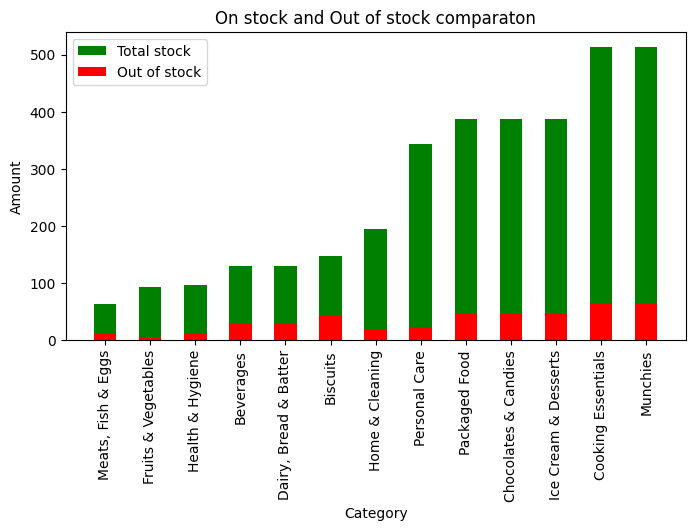

In [24]:
plt.figure(figsize=(8,4))
plt.bar(df_cat.index, df_cat.values , label ="Total stock", color="green", width=0.5)
plt.bar(df_oos.index, df_oos.values , label ="Out of stock", color="red", width=0.5)
plt.xticks(rotation= 90)
plt.title("On stock and Out of stock comparaton")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.legend()

lets see if we can do more exprloring in the data with quantity amount and prices

In [25]:
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2.5,16,3,2.1,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4.2,16,3,3.5,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5.1,15,3,4.3,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2.0,15,3,1.7,100,False,100
4,Fruits & Vegetables,Ladies Finger,1.4,14,3,1.2,250,False,250


In [26]:
# how much monrey does each category have
df_mrp = df.groupby("Category")["mrp"].sum()
df_mrp = df_mrp.sort_values()
df_mrp


Category
Fruits & Vegetables       437.2
Biscuits                  874.5
Meats, Fish & Eggs       1179.9
Dairy, Bread & Batter    1531.3
Beverages                1531.3
Health & Hygiene         1544.0
Home & Cleaning          2951.8
Chocolates & Candies     6042.2
Packaged Food            6042.2
Ice Cream & Desserts     6042.2
Personal Care            7124.9
Cooking Essentials       8045.9
Munchies                 8045.9
Name: mrp, dtype: float64

In [27]:
df_dsp = df.groupby("Category")["discountedSellingPrice"].sum()
df_dsp = df_dsp.sort_values()
df_dsp

Category
Fruits & Vegetables       370.50
Biscuits                  775.86
Meats, Fish & Eggs       1033.80
Dairy, Bread & Batter    1338.10
Beverages                1338.10
Health & Hygiene         1414.80
Home & Cleaning          2744.10
Chocolates & Candies     5473.80
Packaged Food            5473.80
Ice Cream & Desserts     5473.80
Personal Care            6527.00
Cooking Essentials       7238.50
Munchies                 7238.50
Name: discountedSellingPrice, dtype: float64

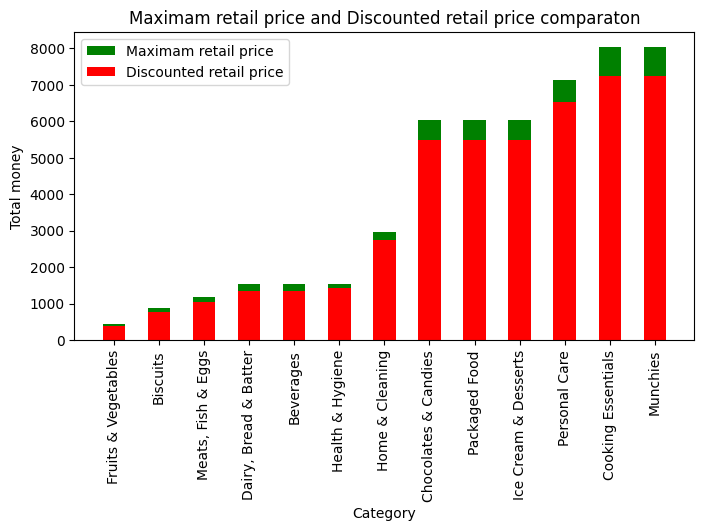

In [28]:
plt.figure(figsize=(8,4))
plt.bar(df_mrp.index, df_mrp.values , label ="Maximam retail price", color="green", width=0.5)
plt.bar(df_dsp.index, df_dsp.values , label ="Discounted retail price", color="red", width=0.5)
plt.xticks(rotation= 90)
plt.title("Maximam retail price and Discounted retail price comparaton")
plt.xlabel("Category")
plt.ylabel("Total money")
plt.legend()

In [29]:
df_margin = df_mrp - df_dsp
df_margin = df_margin.sort_values()
df_margin

Category
Fruits & Vegetables       66.70
Biscuits                  98.64
Health & Hygiene         129.20
Meats, Fish & Eggs       146.10
Dairy, Bread & Batter    193.20
Beverages                193.20
Home & Cleaning          207.70
Chocolates & Candies     568.40
Packaged Food            568.40
Ice Cream & Desserts     568.40
Personal Care            597.90
Cooking Essentials       807.40
Munchies                 807.40
dtype: float64

Text(0, 0.5, 'Differen money')

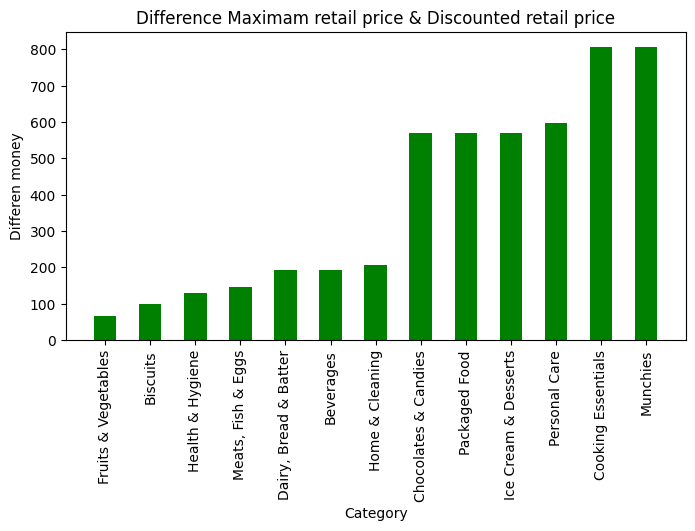

In [30]:
plt.figure(figsize=(8,4))
plt.bar(df_margin.index, df_margin.values , label ="Difference between maximam and discounted retail price", color="green", width=0.5)
#plt.bar(df_dsp.index, df_dsp.values , label ="Discounted retail price", color="red", width=0.5)
plt.xticks(rotation= 90)
plt.title("Difference Maximam retail price & Discounted retail price")
plt.xlabel("Category")
plt.ylabel("Differen money")


In [31]:
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2.5,16,3,2.1,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4.2,16,3,3.5,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5.1,15,3,4.3,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2.0,15,3,1.7,100,False,100
4,Fruits & Vegetables,Ladies Finger,1.4,14,3,1.2,250,False,250


how much money do we have in the inventry with discounted retail price. 

In [32]:
df_asdf = df
df_asdf["Amount available money"] = df_asdf["availableQuantity"] * df_asdf["discountedSellingPrice"]
df_availabe_money = df.groupby("Category")["Amount available money"].sum()
df_availabe_money = df_availabe_money.sort_values()
df_availabe_money


Category
Fruits & Vegetables       1084.60
Meats, Fish & Eggs        2069.30
Biscuits                  2500.76
Dairy, Bread & Batter     5505.10
Beverages                 5505.10
Health & Hygiene          6418.00
Home & Cleaning          12266.10
Chocolates & Candies     22438.50
Packaged Food            22438.50
Ice Cream & Desserts     22438.50
Personal Care            27084.90
Cooking Essentials       33736.90
Munchies                 33736.90
Name: Amount available money, dtype: float64

Text(0, 0.5, 'Availabel Money')

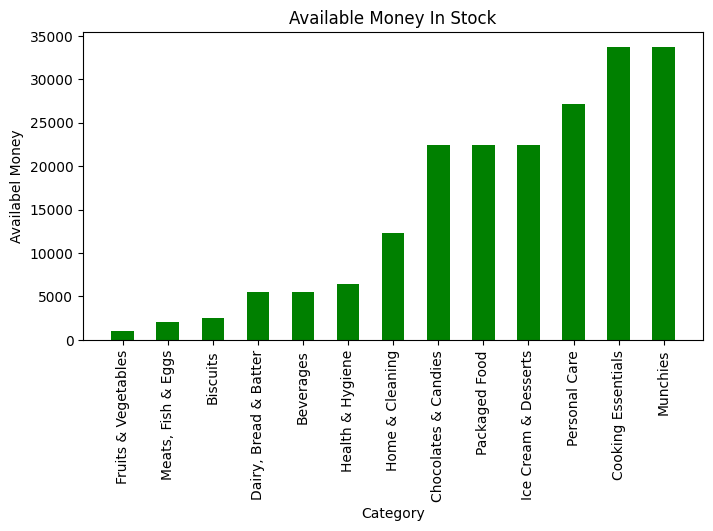

In [33]:
plt.figure(figsize=(8,4))
plt.bar(df_availabe_money.index, df_availabe_money.values , label ="Available Money", color="green", width=0.5)
#plt.bar(df_dsp.index, df_dsp.values , label ="Discounted retail price", color="red", width=0.5)
plt.xticks(rotation= 90)
plt.title("Available Money In Stock")
plt.xlabel("Category")
plt.ylabel("Availabel Money")

In [34]:
df.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity,Amount available money
0,Fruits & Vegetables,Onion,2.5,16,3,2.1,1000,False,1,6.3
1,Fruits & Vegetables,Tomato Hybrid,4.2,16,3,3.5,1000,False,1,10.5
2,Fruits & Vegetables,Tender Coconut,5.1,15,3,4.3,58,False,1,12.9
3,Fruits & Vegetables,Coriander Leaves,2.0,15,3,1.7,100,False,100,5.1
4,Fruits & Vegetables,Ladies Finger,1.4,14,3,1.2,250,False,250,3.6


which category has the most expensive average price 

In [35]:
df_ave_mrp_price = df.groupby("Category")["mrp"].mean()
df_ave_mrp_price = df_ave_mrp_price.sort_values()
df_ave_mrp_price

Category
Fruits & Vegetables       4.701075
Biscuits                  5.948980
Dairy, Bread & Batter    11.870543
Beverages                11.870543
Home & Cleaning          15.215464
Chocolates & Candies     15.572680
Packaged Food            15.572680
Ice Cream & Desserts     15.572680
Munchies                 15.653502
Cooking Essentials       15.653502
Health & Hygiene         15.917526
Meats, Fish & Eggs       18.728571
Personal Care            20.711919
Name: mrp, dtype: float64

In [36]:
df_ave_drp_price = df.groupby("Category")["discountedSellingPrice"].mean()
df_ave_drp_price = df_ave_drp_price.sort_values()
df_ave_drp_price

Category
Fruits & Vegetables       3.983871
Biscuits                  5.277959
Dairy, Bread & Batter    10.372868
Beverages                10.372868
Cooking Essentials       14.082685
Munchies                 14.082685
Ice Cream & Desserts     14.107732
Chocolates & Candies     14.107732
Packaged Food            14.107732
Home & Cleaning          14.144845
Health & Hygiene         14.585567
Meats, Fish & Eggs       16.409524
Personal Care            18.973837
Name: discountedSellingPrice, dtype: float64

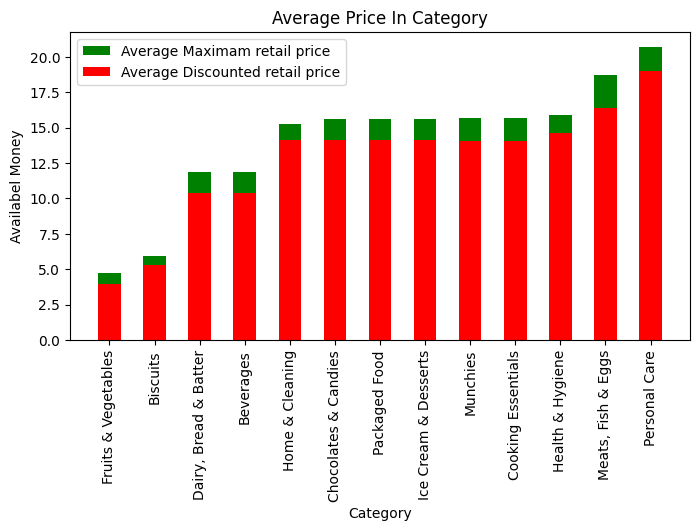

In [37]:
plt.figure(figsize=(8,4))
plt.bar(df_ave_mrp_price.index, df_ave_mrp_price.values , label ="Average Maximam retail price", color="green", width=0.5)
plt.bar(df_ave_drp_price.index, df_ave_drp_price.values , label ="Average Discounted retail price", color="red", width=0.5)
plt.xticks(rotation= 90)
plt.title("Average Price In Category")
plt.xlabel("Category")
plt.ylabel("Availabel Money")
plt.legend()

In [38]:
df_asdf_c = df_asdf[df_asdf["Category"]== "Chocolates & Candies"]
df_asdf_c.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity,Amount available money
2155,Chocolates & Candies,Maggi 2 Minute Masala Noodles,1.2,0,6,1.2,70,False,70,7.2
2156,Chocolates & Candies,iD Idli & Dosa Batter,8.0,15,6,6.8,1000,False,1,40.8
2157,Chocolates & Candies,iD Malabar Parota,8.0,10,4,7.2,400,False,400,28.8
2158,Chocolates & Candies,iD Wheat Lachha Paratha,8.0,12,6,7.0,400,False,400,42.0
2159,Chocolates & Candies,McCain Aloo Tikki,11.0,4,6,10.5,400,False,400,63.0


In [39]:
df_asdf_i = df_asdf[df_asdf["Category"] == "Ice Cream & Desserts"]
df_asdf_i.head()

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity,Amount available money
1767,Ice Cream & Desserts,Maggi 2 Minute Masala Noodles,1.2,0,6,1.2,70,False,70,7.2
1768,Ice Cream & Desserts,iD Idli & Dosa Batter,8.0,15,6,6.8,1000,False,1,40.8
1769,Ice Cream & Desserts,iD Malabar Parota,8.0,10,4,7.2,400,False,400,28.8
1770,Ice Cream & Desserts,iD Wheat Lachha Paratha,8.0,12,6,7.0,400,False,400,42.0
1771,Ice Cream & Desserts,McCain Aloo Tikki,11.0,4,6,10.5,400,False,400,63.0
